<a href="https://colab.research.google.com/github/tomasz-soltysiak/NLP_IndianLanguage/blob/master/NLP_Nueral_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.patches as mpatches
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score,roc_curve,confusion_matrix,roc_auc_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [3]:
df_train=pd.read_csv('/content/tamil_movie_reviews_train.csv',delimiter=',')
df_test=pd.read_csv('/content/tamil_movie_reviews_test.csv',delimiter=',')
df_train.shape

(480, 3)

In [4]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#stop_words = set(stopwords.words('')) 
porter=PorterStemmer()
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [porter.stem(word) for word in text]
    #text = [lemmatizer.lemmatize(token) for token in text]
    #text = [lemmatizer.lemmatize(token, "v") for token in text]
    #text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

df_train['ReviewInTamil1'] = df_train.ReviewInTamil.apply(lambda x: clean_text(x))
df_test['ReviewInTamil1'] = df_test.ReviewInTamil.apply(lambda x: clean_text(x))
df_train.head()







,ReviewId,ReviewInTamil,Rating,ReviewInTamil1
0,408,"தமிழ் சினிமாவில் ஒரு சிலர் மட்டுமே பணம், பிஸின...",4.00,த ம ழ ச ன ம வ ல ஒ ர ச ல ர ம ட ட ம ப ...
1,107,கரு : சினிமா படப்பிடிப்புகளில் வெளிச்சம் பாய்ச...,2.00,க ர ச ன ம ப ட ப ப ட ப ப க ள ல வ ள ச ச ...
2,319,தமிழ் சினிமாவில் தற்போது நாயகர்களுக்கு இணையாக ...,3.25,த ம ழ ச ன ம வ ல த ற ப த ந ய க ர க ள க க ...
3,484,உலக அளவில் அனைத்து தரப்பினரையும் தன் நடிப்பால்...,2.25,உ ல க அ ள வ ல அ ன த த த ர ப ப ன ர ய ம ...
4,204,"கரு : வில்லனின் கையாள் , வில்லன் செய்த நம்பிக்...",3.00,க ர வ ல ல ன ன க ய ள வ ல ல ன ச ய த ...


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


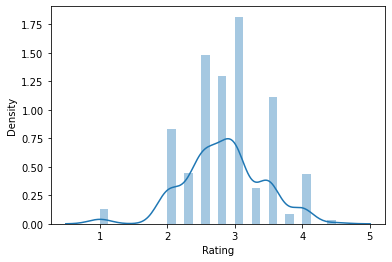

In [46]:
sns.distplot(df_train['Rating'])

In [35]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import initializers, regularizers, constraints, optimizers, layers
max_features = 130
tokenizer=Tokenizer(num_words=max_features)
scaler=StandardScaler()
tokenizer.fit_on_texts(df_train['ReviewInTamil1'])
list_tokenized_train = tokenizer.texts_to_sequences(df_train['ReviewInTamil1'])


#list_tokenized_test = tokenizer.texts_to_sequences(df_test['ReviewInTamil1'])
maxlen = 130

X_train = tokenizer.texts_to_matrix(df_train['ReviewInTamil1'])

y_train = df_train['Rating']
#y_train=np.array(scaler.fit_transform(y_train))

X_test = tokenizer.texts_to_matrix(df_test['ReviewInTamil1'])
y_test = df_test['Rating']

embed_size = 128
model = Sequential()

model.add(layers.Dense(units=12,input_shape=(130,)))
model.add(Dropout(0.05))
model.add(layers.Dense(32, activation="relu"))
model.add(Dropout(0.05))
model.add(layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mse'])

batch_size = 100
epochs = 30
callbacks=[EarlyStopping(monitor='val_loss',patience=4)]
model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2,callbacks=callbacks)
'''

model.add(Embedding(max_features, embed_size))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(GlobalMaxPool1D())
'''

Epoch 1/30
4/4 [==============================] - 0s 29ms/step - loss: 7.4305 - mse: 7.4305 - val_loss: 4.4649 - val_mse: 4.4649
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 3.9781 - mse: 3.9781 - val_loss: 2.2739 - val_mse: 2.2739
Epoch 3/30
4/4 [==============================] - 0s 6ms/step - loss: 1.9845 - mse: 1.9845 - val_loss: 0.9968 - val_mse: 0.9968
Epoch 4/30
4/4 [==============================] - 0s 5ms/step - loss: 1.0555 - mse: 1.0555 - val_loss: 0.4722 - val_mse: 0.4722
Epoch 5/30
4/4 [==============================] - 0s 5ms/step - loss: 0.7314 - mse: 0.7314 - val_loss: 0.3344 - val_mse: 0.3344
Epoch 6/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6103 - mse: 0.6103 - val_loss: 0.3188 - val_mse: 0.3188
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 0.5718 - mse: 0.5718 - val_loss: 0.3121 - val_mse: 0.3121
Epoch 8/30
4/4 [==============================] - 0s 5ms/step - loss: 0.5403 - mse: 0.5403 - val_loss: 

'\n\nmodel.add(Embedding(max_features, embed_size))\nmodel.add(Bidirectional(LSTM(32, return_sequences = True)))\nmodel.add(GlobalMaxPool1D())\n'

In [36]:
y_pred=model.predict(X_test)
mean_squared_error(y_test,y_pred)

0.4045337879765494

In [38]:
dict_={"y_test":y_test,"y_pred":list(y_pred)}
output_df=pd.DataFrame(dict_)
output_df.head(100)

,y_test,y_pred
0,2.75,[2.507499]
1,2.00,[2.4338665]
2,2.00,[2.5095768]
3,2.00,[2.4709992]
4,2.50,[2.7381663]
...,...,...
95,3.00,[2.5244994]
96,3.00,[2.6113648]
97,2.00,[2.7036061]
98,3.00,[2.446112]


In [39]:
# I will create second similar NN but using Embending, LSTM
model2=Sequential()
model2.add(layers.Embedding(input_dim=1000,output_dim=130))

model2.add(layers.LSTM(units=130))

model2.add(layers.Dense(units=1))
model2.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mse'])
batch_size = 100
epochs = 15
callbacks=[EarlyStopping(monitor='val_loss',patience=4)]
model2.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2,callbacks=callbacks)

Epoch 1/15
4/4 [==============================] - 2s 440ms/step - loss: 5.7235 - mse: 5.7235 - val_loss: 0.3291 - val_mse: 0.3291
Epoch 2/15
4/4 [==============================] - 1s 332ms/step - loss: 0.3586 - mse: 0.3586 - val_loss: 0.3105 - val_mse: 0.3105
Epoch 3/15
4/4 [==============================] - 1s 333ms/step - loss: 0.3492 - mse: 0.3492 - val_loss: 0.3181 - val_mse: 0.3181
Epoch 4/15
4/4 [==============================] - 1s 322ms/step - loss: 0.3543 - mse: 0.3543 - val_loss: 0.4244 - val_mse: 0.4244
Epoch 5/15
4/4 [==============================] - 1s 326ms/step - loss: 0.4828 - mse: 0.4828 - val_loss: 0.3405 - val_mse: 0.3405
Epoch 6/15
4/4 [==============================] - 1s 324ms/step - loss: 0.3601 - mse: 0.3601 - val_loss: 0.3103 - val_mse: 0.3103
Epoch 7/15
4/4 [==============================] - 1s 322ms/step - loss: 0.3502 - mse: 0.3502 - val_loss: 0.5049 - val_mse: 0.5049
Epoch 8/15
4/4 [==============================] - 1s 320ms/step - loss: 0.5361 - mse: 0.53

In [40]:
y_pred=model2.predict(X_test)
mean_squared_error(y_test,y_pred)

0.39836243034010493

In [ ]:
sum(tokenizer.texts_to_matrix(df_train['ReviewInTamil']))